In [42]:
import numpy as np
import pandas as pd

In [43]:
dataset = pd.read_csv('../datasets/Data.csv')
X = dataset.iloc[ : , : -1].values
y = dataset.iloc[ : , -1].values
print('X.shape = {}'.format(X.shape))
print(X)
print(y)
dataset.describe()

X.shape = (10, 3)
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


[v0.17 sklearn.preprocessing.Imputer](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.preprocessing.Imputer.html)

[v0.20.1 sklearn.impute.SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [44]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[ : , 1:3])
X[ : , 1:3] = imputer.transform(X[ : , 1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


D:\ProgramData\envs\tfpy371\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


[v0.17 sklearn.preprocessing.LabelEncoder](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.preprocessing.LabelEncoder.html)

[v0.20.1 sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

[v0.17 sklearn.preprocessing.OneHotEncoder](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[v0.20.1 sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
print(np.unique(X[: , 0]))
X[ : , 0] = labelencoder_X.fit_transform(X[ : , 0])
print(X[ : , 0])

['France' 'Germany' 'Spain']
[0 2 1 2 1 0 2 0 1 0]


In [46]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(X[ : ,:3])
print('X.shape = {}'.format(X.shape))
print(y)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
X.shape = (10, 5)
[0 1 0 0 1 1 0 1 0 1]


D:\ProgramData\envs\tfpy371\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\ProgramData\envs\tfpy371\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


[v0.20.1 sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X_train.shape = {}'.format(X_train.shape))
print('X_test.shape = {}'.format(X_test.shape))
print('y_train.shape = {}'.format(y_train.shape))
print('y_test.shape = {}'.format(y_test.shape))

X_train.shape = (8, 5)
X_test.shape = (2, 5)
y_train.shape = (8,)
y_test.shape = (2,)


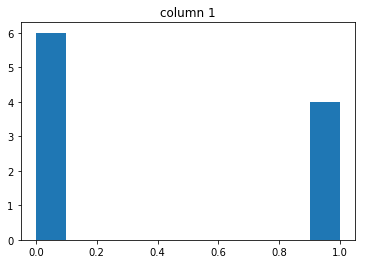

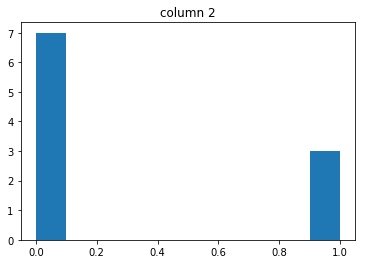

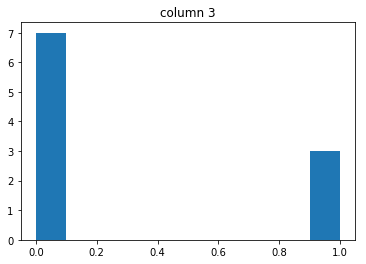

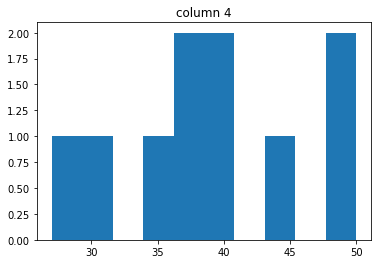

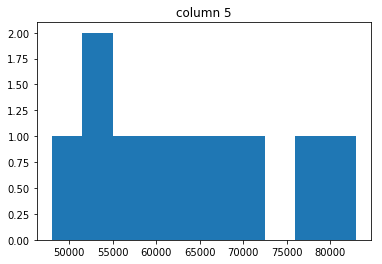

In [48]:
import matplotlib.pyplot  as plt
%matplotlib inline

def plt_data(array):
    for i in range(array.shape[1]):    
        plt.hist(array[ : ,i])
        plt.title('column {}'.format(i + 1))
        plt.show()

plt_data(X)

[v0.20.1 sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

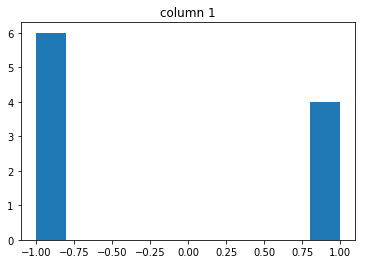

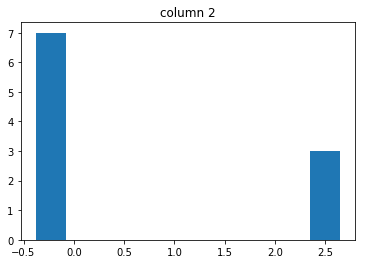

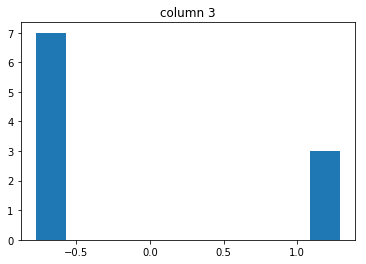

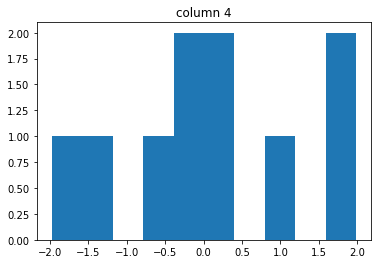

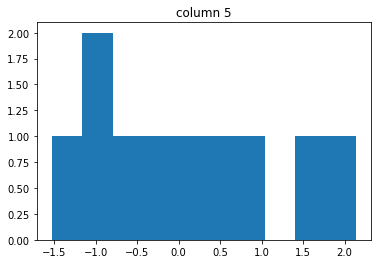

In [49]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X_train = sc_X.fit_transform(X_train)
sc_X_test = sc_X.transform(X_test)

X_all = np.concatenate((sc_X_train, sc_X_test))
plt_data(X_all)

# 探索fit的合适方法
## 所有数据整体fit

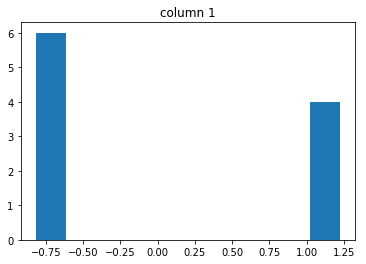

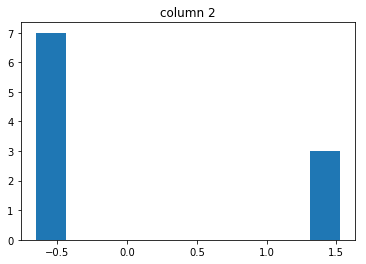

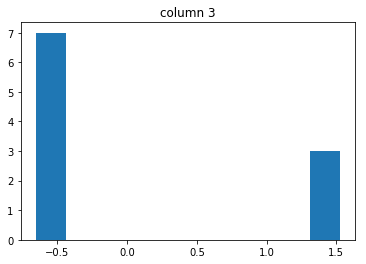

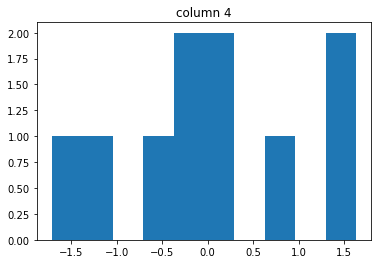

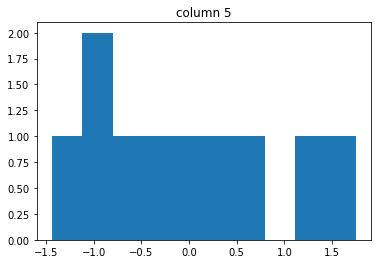

In [55]:
sc_X2 = StandardScaler()
sc_X2.fit(X)
X_all = sc_X.transform(X)
plt_data(X_all)